In [56]:
import random
import numpy as np
import matplotlib.pyplot as plt

def generatePointCluster(clusters,points):
    total=[]
    for j in range(clusters):
        x_sum=0
        y_sum=0
        for i in range(points):
            point=[]
            x=random.randrange(0,100)
            y=random.randrange(0,100)
            x_sum+=x
            y_sum+=y
            point.append(x)
            point.append(y)
            total.append(point)

        x_sum/=points
        y_sum/=points
        x_move=random.randrange(-10,10)*30
        y_move=random.randrange(-10,10)*30
        for i in total:
            i[0]-=x_sum
            i[0]+=x_move
            i[1]-=y_sum
            i[1]+=y_move
    totals_np=np.array(total)
    print(totals_np.shape)
    plt.figure()
    plt.scatter(totals_np[:,0],totals_np[:,1])
    plt.show()
    return totals_np

def initialiseLabel(clusters,totals):
    labels=[]
    for i in range(totals.shape[0]):
        labels.append([random.randrange(0,clusters)])
    labels_np=np.array(labels)
    print(labels_np.shape)
    data=np.concatenate((totals,labels_np),axis=1)
    print(data.shape)
    for i in range(totals.shape[0]):
        if(labels_np[i]==0):
            plt.scatter(totals[i,0],totals[i,1],color='r')
        if(labels_np[i]==1):
            plt.scatter(totals[i,0],totals[i,1],color='g')
        if(labels_np[i]==2):
            plt.scatter(totals[i,0],totals[i,1],color='b')
    plt.show()
    return data

def computeCentroid(clusters,data):
    size=[0,0,0]
    centroids=[[0.0,0.0],[0.0,0.0],[0.0,0.0]]
    centroids_np=np.array(centroids)
    for i in data:
        centroids_np[int(i[2])]+=i[0:2]
        size[int(i[2])]+=1
    for i in range(len(size)):
        if(size[i]!=0):
            centroids_np[i]/=size[i]
    print(centroids_np)
    return centroids_np


def computeDistance(data,centroids_np):
    dist=[]
    for i in data:
        now=[]
        for j in centroids_np:
                x =i[0]-j[0]
                y=i[1]-j[1]
                now.append(x*x+y*y)
        dist.append(now)
    dist_np=np.array(dist)
    return dist_np

def computeEnergy(data,centroids_np):
    sum=0
    for i in data:
        ix=i[0]-centroids_np[int(i[2])][0]
        iy=i[1]-centroids_np[int(i[2])][1]
        sum+=(ix*ix+iy*iy)
    return sum/data.shape[0]


def assignLabel(clusters,dist,data):
    change=False
    energy=[]
    while(change==False):
        for i in range(data.shape[0]):
            if(data[i][2]!=dist[i].argmin()):
                data[i][2]=dist[i].argmin()
                change=True
        if(change==False):
            break
        if(change==True):
            for i in data:
                if(i[2]==0):
                    plt.scatter(i[0],i[1],color='r')
                if(i[2]==1):
                    plt.scatter(i[0],i[1],color='g')
                if(i[2]==2):
                    plt.scatter(i[0],i[1],color='b')

            plt.show()
            centroid=computeCentroid(clusters,data)
            dist=computeDistance(data,centroid)
            energy.append(computeEnergy(data,centroid))
            change=False


    return energy


3개의 군집과 군집당 30개의 점들을 랜덤으로 생성합니다.
random으로 [0,100)의 범위로 x,y점을 생성합니다.
한 군집을 평균을 구하고 [-10,10)의 범위 의 랜덤 수를 C라 하면
\begin{equation} 
\tilde{x}=x- \hat{x}
\end{equation}
\begin{equation} 
\tilde{y}=y-\hat{y}
\end{equation}
\begin{equation} 
\grave{x}=\tilde{x}+ C*30
\end{equation}
\begin{equation} 
\grave{y}=\tilde{y}+ C*30
\end{equation}
식을 이용하여 군집을 만들었습다.


(90, 2)


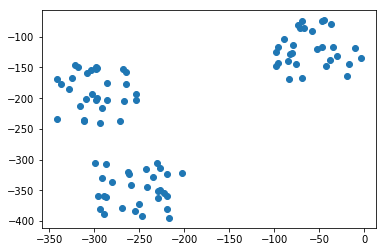

In [58]:
clusters=3
points=30
total=generatePointCluster(clusters,points)


[0,clusters)범위로 최초의 라벨을 랜덤으로 정했습다.

(90, 1)
(90, 3)


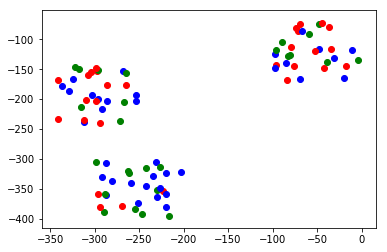

In [59]:
data=initialiseLabel(clusters,total)


중심값은 label k의 크기 n 이라하면 label k의 중심 값은
\begin{equation} 
\lbrace\sideset{_1^n}{x_\mathbf{k}}\sum * \frac{1}{n}  , \sideset{_1^n}{y_\mathbf{k}}\sum \frac{1}{n}\rbrace
\end{equation}
으로 구했습니다.
초기 중심값은 삼각형으로 표시하였습니다.


[[-190.09310345 -179.85402299]
 [-206.51410256 -231.45769231]
 [-213.0552381  -241.38095238]]


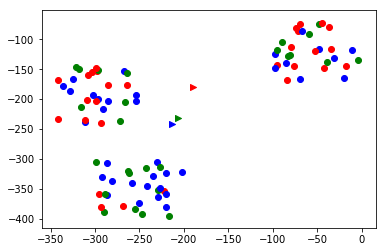

In [62]:
centroid=computeCentroid(clusters,data)
plt.scatter(centroid[0][0],centroid[0][1],color='r',marker='>')
plt.scatter(centroid[1][0],centroid[1][1],color='g',marker='>')
plt.scatter(centroid[2][0],centroid[2][1],color='b',marker='>')
for i in data:
    if(i[2]==0):
        plt.scatter(i[0],i[1],color='r')
    if(i[2]==1):
        plt.scatter(i[0],i[1],color='g')
    if(i[2]==2):
        plt.scatter(i[0],i[1],color='b')
plt.show()


거리는 
\begin{equation} 
d=(x_\mathbf{1}-x_\mathbf{2})^2+(y_\mathbf{1}-y_\mathbf{2})^2
\end{equation}
식으로 구했습니다.

In [63]:
dist=computeDistance(data,centroid)

print(dist.shape)

(90, 3)


초기 에너지를 구합니다.
에너지는 
\begin{equation} 
\frac{1}{n} * \sideset{_1^n}{(x_\mathbf{i}-c_\mathbf{k})^2}\sum
\end{equation}
로 구했습니다.

In [64]:
energy=[]
energy.append(computeEnergy(data,centroid))

각 반복의 에너지를 연산하면서 중심값이 변하지 않을때까지 반복합니다.

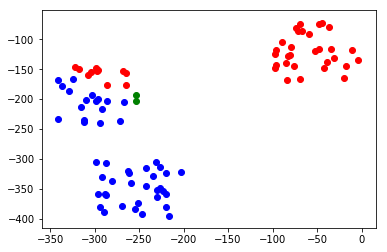

[[-122.56666667 -129.86178862]
 [-253.56666667 -198.16666667]
 [-272.48156028 -297.04964539]]


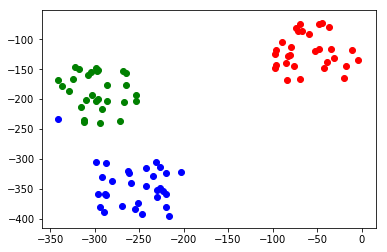

[[ -60.         -120.        ]
 [-297.18735632 -186.32183908]
 [-255.50215054 -344.47311828]]


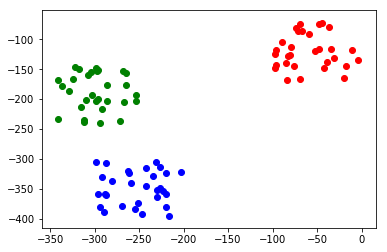

[[ -60.         -120.        ]
 [-298.66666667 -187.9       ]
 [-252.63333333 -348.16666667]]


In [65]:
energy+=assignLabel(clusters,dist,data)

최종 중심값을 세모로 그리고 다시 데이터를 전부 그려보면 다음과 같습니다.

[[ -60.         -120.        ]
 [-298.66666667 -187.9       ]
 [-252.63333333 -348.16666667]]


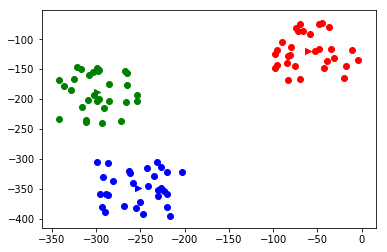

In [67]:
centroid=computeCentroid(clusters,data)
plt.scatter(centroid[0][0],centroid[0][1],color='r',marker='>')
plt.scatter(centroid[1][0],centroid[1][1],color='g',marker='>')
plt.scatter(centroid[2][0],centroid[2][1],color='b',marker='>')
for i in data:
    if(i[2]==0):
        plt.scatter(i[0],i[1],color='r')
    if(i[2]==1):
        plt.scatter(i[0],i[1],color='g')
    if(i[2]==2):
        plt.scatter(i[0],i[1],color='b')
plt.show()

초기 에너지부터 마지막까지 에너지를 그래프로 그리면 다음과 같습니다.

[20550.833623517145, 9045.0696849833785, 1722.6520998640467, 1541.8670370370369]


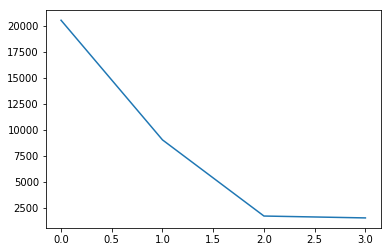

In [68]:
print(energy)
plt.plot(energy)
plt.show()

github 주소 :https://github.com/namwooong/assignment03